In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve

pd.options.display.max_columns = 200
pd.options.display.max_rows = 100

In [2]:
import os

os.listdir("./data/processed")

['df_train.csv']

In [3]:
df_train = pd.read_csv("./data/processed/df_train.csv")

df_train

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,Var12,Var13,Var14,Var16,Var17,Var18,Var19,Var21,Var22,Var23,Var24,Var25,Var26,Var27,Var28,Var29,Var30,Var33,Var34,Var35,Var36,Var37,Var38,Var40,Var41,Var43,Var44,Var45,Var46,Var47,Var49,Var50,Var51,Var53,Var54,Var56,Var57,Var58,Var59,Var60,Var61,Var62,Var63,Var64,Var65,Var66,Var67,Var68,Var69,Var70,Var71,Var72,Var73,Var74,Var75,Var76,Var77,Var78,Var80,Var81,Var82,Var83,Var84,Var85,Var86,Var87,Var88,Var89,Var90,Var91,Var92,Var93,Var94,Var95,Var96,Var97,Var98,Var99,Var100,Var101,Var102,Var103,Var104,Var105,Var106,Var107,Var108,Var109,Var110,Var111,...,Var125,Var126,Var127,Var128,Var129,Var130,Var131,Var132,Var133,Var134,Var135,Var136,Var137,Var138,Var139,Var140,Var142,Var143,Var144,Var145,Var146,Var147,Var148,Var149,Var150,Var151,Var152,Var153,Var154,Var155,Var156,Var157,Var158,Var159,Var160,Var161,Var162,Var163,Var164,Var165,Var166,Var168,Var170,Var171,Var172,Var173,Var174,Var176,Var177,Var178,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var213,Var214,Var215,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,churn
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,NaN,184.0,NaN,NaN,NaN,NaN,NaN,464.0,580.0,NaN,14.0,128.0,NaN,NaN,166.56,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3570.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.076907,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,35.0,NaN,1350864.0,NaN,0.0,NaN,7333.11,NaN,5.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,...,720.0,8.0,NaN,NaN,NaN,NaN,NaN,0.0,1212385.0,69134.0,NaN,NaN,NaN,NaN,NaN,185.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,397579.0,NaN,NaN,NaN,1812252.0,NaN,NaN,NaN,NaN,NaN,NaN,142.0,NaN,NaN,38418.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,462.0,NaN,NaN,bZkvyxLkBI,RO12,NaN,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,NaN,NaN,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,NaN,NaN,NaN,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,0
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,168.0,210.0,NaN,2.0,24.0,NaN,NaN,353.52,NaN,NaN,NaN,NaN,0.0,NaN,NaN,4764966.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.408032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,26,0.0,NaN,2872928.0,NaN,3.0,NaN,151098.90,NaN,25.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4136430.0,357038.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,9.0,NaN,NaN,NaN,NaN,278334.0,NaN,NaN,NaN,10439160.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,NaN,238572.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEat0G8rTN,RO12,NaN,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,NaN,NaN,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,NaN,NaN,NaN,kZJyVg2,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,1
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,NaN,904.0,NaN,NaN,NaN,NaN,NaN,1212.0,1515.0,NaN,26.0,816.0,NaN,NaN,220.08,NaN,NaN,NaN,NaN,0.0,NaN,NaN,5883894.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.599658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130,518.0,NaN,1675776.0,NaN,0.0,NaN,16211.58,NaN,40.0,NaN,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,312.0,NaN,NaN,...,5967.0,-28.0,NaN,NaN,NaN,NaN,NaN,0.0,3478905.0,248932.0,NaN,NaN,NaN,NaN,NaN,800.0,NaN,0.0,36.0,NaN,NaN,NaN,NaN,320565.0,NaN,NaN,NaN,9826360.0,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,NaN,434946.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9Xo

In [4]:
"""base rate"""

df_train.churn.mean()

0.07344

In [5]:
"""simple tree test"""
df_numeric = df_train.copy()

for col in df_numeric.columns:
    if df_numeric[col].dtype == "object":
        df_numeric[col] = pd.Categorical(df_numeric[col])  # TODO: is this necessary?
        df_numeric[col] = df_numeric[col].cat.codes

df_numeric = df_numeric.fillna(-9999)        
        
model_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_split=100,
    min_samples_leaf=150
)

split_index = 40000

model_tree.fit(df_numeric.iloc[:split_index,:-1], df_train.churn[:split_index])

y_true = df_train.churn[split_index:]
y_pred = model_tree.predict_proba(df_numeric.iloc[split_index:,:-1])[:,1]

print(f"""Score on train: {roc_auc_score(
    df_train.churn[:split_index],
    model_tree.predict_proba(df_numeric.iloc[:split_index,:-1])[:,1],
)} """)

print(f"""Score on test: {roc_auc_score(
    y_true,
    y_pred,
)} """)

Score on train: 0.7325328145518469 
Score on test: 0.6951695289359763 


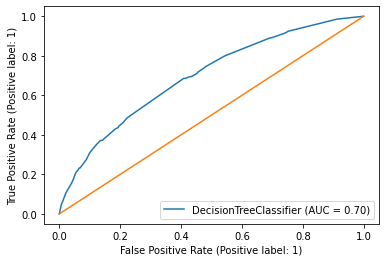

In [6]:
fig, ax = plt.subplots(1, 1,)

plot_roc_curve(model_tree, df_numeric.iloc[split_index:,:-1], y_true, ax=ax)

# add vertical for comparison
line = ax.lines[0]
x = line.get_xdata()
ax.plot(x, x)

plt.show()

In [7]:
# Confirming with cross validation
from sklearn.model_selection import cross_validate

model_cv = DecisionTreeClassifier(
    criterion="gini",
    max_depth=7,
    min_samples_split=100,
    min_samples_leaf=150
)

cross_validate(
    estimator=model_cv,
    X = df_numeric.iloc[:, :-1],
    y = df_numeric.churn,
    cv = 5,
    scoring="roc_auc",
    return_train_score=True
)

{'fit_time': array([1.36863518, 1.35876751, 1.44647503, 1.43844867, 1.21544242]),
 'score_time': array([0.01975513, 0.01728177, 0.02472734, 0.01672959, 0.01638794]),
 'test_score': array([0.69742918, 0.70390189, 0.70184278, 0.66236263, 0.69113862]),
 'train_score': array([0.73107661, 0.72745387, 0.73468612, 0.73919873, 0.72911478])}

In [8]:
"""The train scores a rather unstable, but let's say we have a score of about 0.69."""

"The train scores a rather unstable, but let's say we have a score of about 0.69."